In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

h = 0.7

In [134]:
# low cluster richness
red = pd.read_csv(r'/Users/markforese/Desktop/USRP/git_repos/Intra-Cluster-Light/Data/RED.csv', 
                  header = None, 
                  names = ['r / r_200', 'm / l_i(r)'])

red['m / l_i(r)'] = red['m / l_i(r)'].apply(lambda x: x*h) # changing everything to  h= 0.7

 
colorR = ['$6 \leq N \leq 8$', '$6 \leq N \leq 8$', '$6 \leq N \leq 8$', '$6 \leq N \leq 8$', '$6 \leq N \leq 8$',
          '$6 \leq N \leq 8$', '$6 \leq N \leq 8$', '$6 \leq N \leq 8$', '$6 \leq N \leq 8$', '$6 \leq N \leq 8$',
          '$6 \leq N \leq 8$','$6 \leq N \leq 8$', '$6 \leq N \leq 8$', '$6 \leq N \leq 8$']

red['Bahcall and Kulier, 2014'] = colorR
errR = [0, 0,0, 0, 0, 0,0, 0, 0, 0,0, 0, 0, 0]
red['error'] = errR

# medium cluster richness
green = pd.read_csv(r'/Users/markforese/Desktop/USRP/git_repos/Intra-Cluster-Light/Data/GREEN.csv', 
                  header = None, 
                  names = ['r / r_200', 'm / l_i(r)'])

green['m / l_i(r)'] = green['m / l_i(r)'].apply(lambda x: x*h) # changing everything to  h= 0.7

colorG = ['$9 \leq N \leq 25$','$9 \leq N \leq 25$', '$9 \leq N \leq 25$','$9 \leq N \leq 25$', '$9 \leq N \leq 25$',
          '$9 \leq N \leq 25$', '$9 \leq N \leq 25$','$9 \leq N \leq 25$', '$9 \leq N \leq 25$','$9 \leq N \leq 25$',
          '$9 \leq N \leq 25$','$9 \leq N \leq 25$', '$9 \leq N \leq 25$']
green['Bahcall and Kulier, 2014'] = colorG
errG = [0, 0,0, 0, 0, 1.02*0.7,0, 0, 0, 0,0,0, 0]
green['error'] = errG

# high cluster richness
blue = pd.read_csv(r'/Users/markforese/Desktop/USRP/git_repos/Intra-Cluster-Light/Data/BLUE.csv', 
                  header = None, 
                  names = ['r / r_200', 'm / l_i(r)'])

blue['m / l_i(r)'] = blue['m / l_i(r)'].apply(lambda x: x*h) # changing everything to  h= 0.7

colorB = ['$26 \leq N \leq 220$','$26 \leq N \leq 220$', '$26 \leq N \leq 220$','$26 \leq N \leq 220$',
          '$26 \leq N \leq 220$','$26 \leq N \leq 220$','$26 \leq N \leq 220$','$26 \leq N \leq 220$',
          '$26 \leq N \leq 220$','$26 \leq N \leq 220$', '$26 \leq N \leq 220$']
blue['Bahcall and Kulier, 2014'] = colorB
errB = [0, 0,0, 0, 0, 0,0, 0, 0, 0,0]
blue['error'] = errB

In [135]:
all_colors = pd.concat([red, green,blue])
all_colors

,r / r_200,m / l_i(r),"Bahcall and Kulier, 2014",error
0,0.303700,228.5640,$6 \leq N \leq 8$,0.000
1,0.444216,190.5092,$6 \leq N \leq 8$,0.000
2,0.643936,126.4095,$6 \leq N \leq 8$,0.000
3,0.939057,204.3335,$6 \leq N \leq 8$,0.000
4,1.373540,150.9088,$6 \leq N \leq 8$,0.000
5,1.997060,267.2313,$6 \leq N \leq 8$,0.000
6,2.903610,340.4849,$6 \leq N \leq 8$,0.000
7,4.247060,180.9290,$6 \leq N \leq 8$,0.000
8,6.175000,231.4410,$6 \leq N \leq 8$,0.000
9,8.978130,179.6151,$6 \leq N \leq 8$,0.000


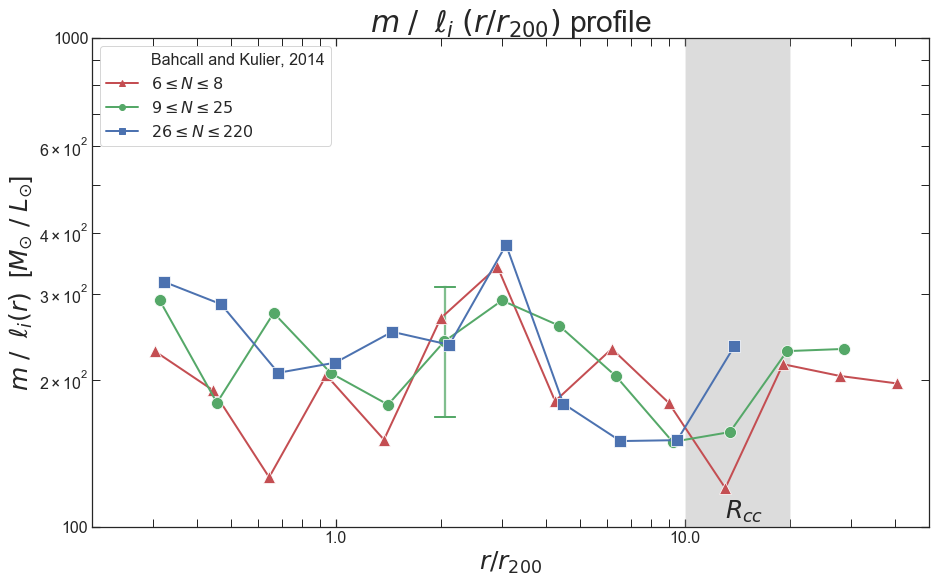

<Figure size 1080x648 with 0 Axes>

In [136]:
import matplotlib.patches as pat
import matplotlib as mpl
from matplotlib.ticker import ScalarFormatter

# changes the style of plot 
sns.set_style('ticks',{"xtick.major.size":8,
"ytick.major.size":8})
fig , ax = plt.subplots()

#this sets the width of the lines
sns.set_context(rc={"lines.linewidth": 2})

# this makes the actual plot
sns_plot = sns.lineplot(x="r / r_200", y="m / l_i(r)", hue='Bahcall and Kulier, 2014',
            palette={"$6 \leq N \leq 8$": "r", "$9 \leq N \leq 25$": "g", "$26 \leq N \leq 220$": 'b'},
           markers=["^", "o", 's'], markersize = 12, data=all_colors, dashes = False, style = 'Bahcall and Kulier, 2014',
legend = 'full')

# sets the axes scales and limits
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(0.2,50)
ax.set_ylim(100,1000)

ax.xaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.set_major_formatter(ScalarFormatter())
# legend size
plt.legend(prop={'size': 16})

# sets the title and axes labels
ax.set_title(r"$m$ $/$  $\ell_{i}$ $(r / r_{200})$ profile", fontsize = 30, fontname = "Arial")
ax.set_xlabel(r"$r / r_{200}$", fontsize = 25, fontname = "Arial")
ax.set_ylabel(r"$m$ $/$  $\ell_{i}(r)$  [$M_{\odot}$ $/$ $L_{\odot}$]", fontsize = 25, fontname = "Arial")

# plots vertical bar for Rcc
plt.axvspan(10, 20,0, 1, facecolor='k', alpha = 0.15)
plt.text(13, 104, '$R_{cc}$', fontsize = 25)

# plots vertical bar for error bar
plt.axvspan(2.025, 2.065,0.228, 0.495, facecolor = 'g', alpha = 0.75)
# and the horizontal bars
plt.axhspan(ymin = 309.5, ymax = 311.02, xmin = 0.410 -0.001, xmax = 0.435 -0.001, color = 'g')
plt.axhspan(ymin = 168, ymax = 169, xmin = 0.409, xmax = 0.434, color = 'g')

# changes the size of the figure, then adjusts the ticks
sns.set(rc={'figure.figsize':(15,9)})
ax.tick_params(axis='both', which = 'both', length = 8, labelsize = 16, bottom = True, top = True, 
               left = True, right = True, direction = 'in')
ax.ticklabel_format(style='plain', axis = 'both')

fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('kulier.png', dpi=100)
plt.show()

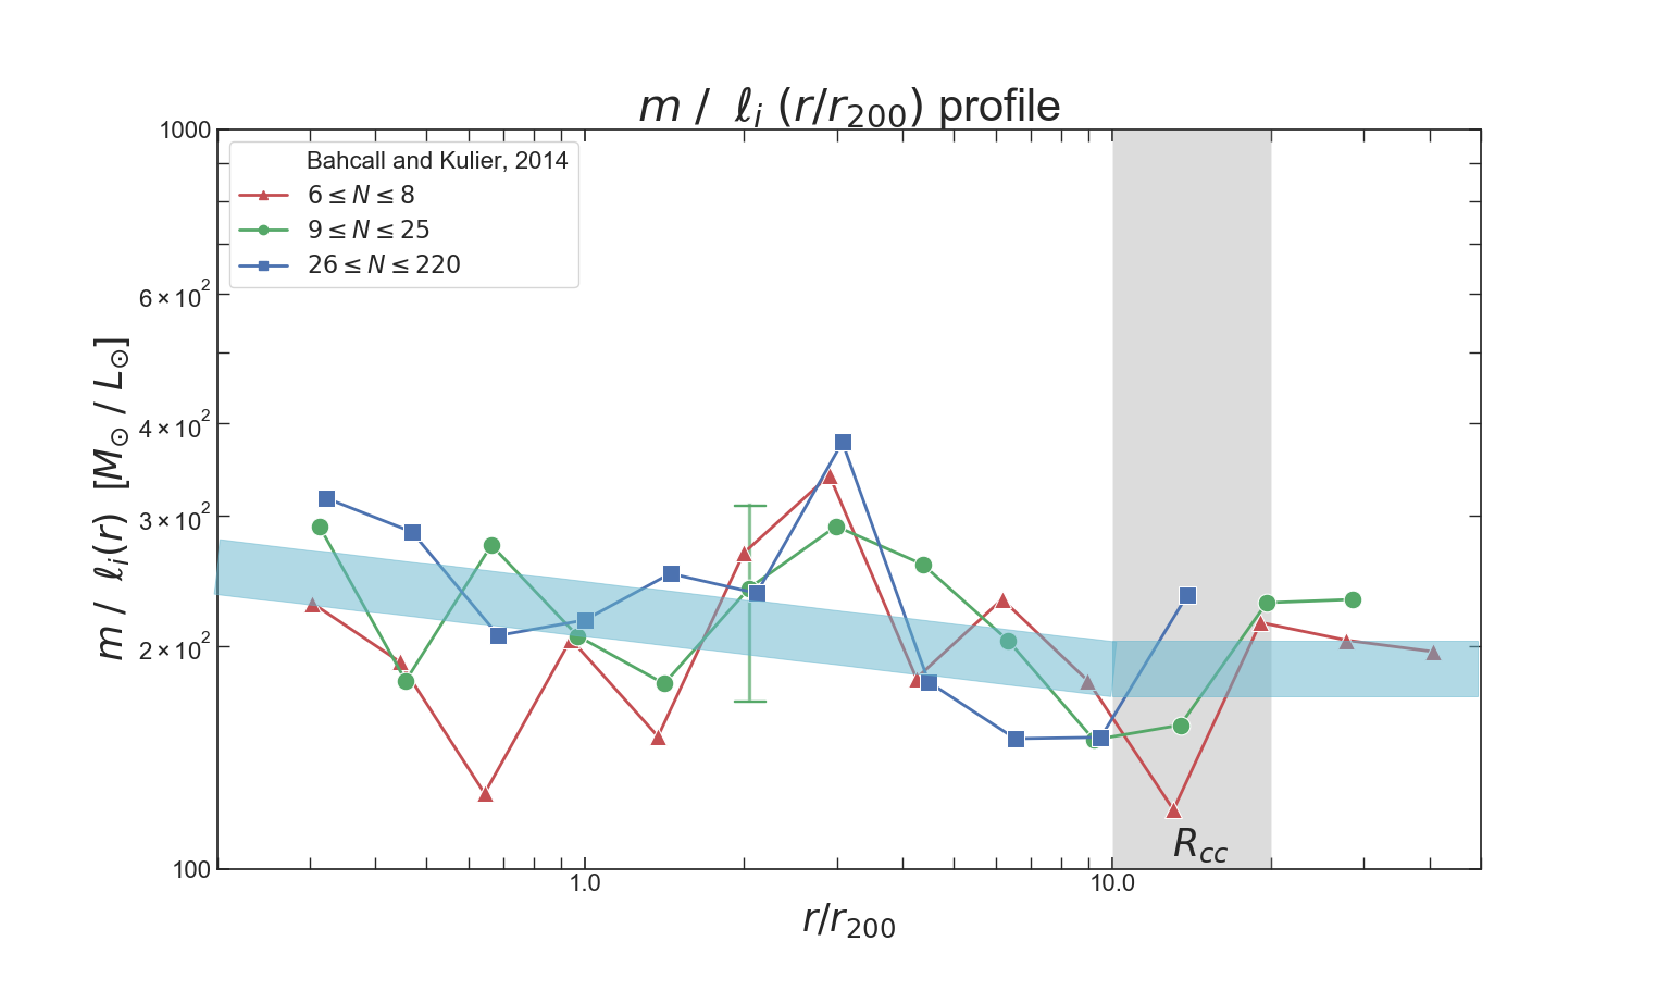

In [138]:
from PIL import Image

fig, ax = plt.subplots()
im = Image.open('kulier.png')

fig = im
# Display the image
plt.imshow(im)

# Get the current reference
ax = plt.gca()

# Create a Rectangle patch
rectdown = pat.Rectangle((190,485),830,50,linewidth=1,edgecolor='c',facecolor='c', alpha = 0.5,angle = 6.5) 
    # starts at m/l = 260 (90% bright, 50% faint), goes down to 198 (bright 30%, faint 20%)
rectflat = pat.Rectangle((1010,578),337,50,linewidth=1,edgecolor='c',facecolor='c', alpha = 0.5,angle = 0)

#rectlabel= pat.Rectangle(()) # this is to label what the band means
    
plt.grid(b=None)
# Add the patch to the Axes


ax.add_patch(rectdown)
ax.add_patch(rectflat)

ax.set_yticklabels([])
ax.set_xticklabels([])

sns.set(rc={'figure.figsize':(31,18)})
plt.imshow(im)
plt.savefig('bandplot1.png')